In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import math
from pprint import pprint
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Rodolfo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Systems of Differential Equations that represent the moviment of a simple pendulum in Cartesian coordinates is given for:
#### Note: The Figure of the pendulum is in the local work directory
### $$x' = u$$ 
### $$y' = v$$
### $$u' = Tx/mL$$
### $$v' = \frac{Ty}{mL} - g$$
### $$L^2 = x^2 + y^2 $$
### $$T' = \frac{3mgv}{L}$$

### We're using a numerical method to solve the system of ordinary differential equations. After that, we will assess how the tension in the string, motions, and speed work overtime

### Forth-order Runge Kutta method
### OED: $$y' = f(x,y),\ y_0 = f(x_0)$$
### Method:
### $$k_1 = hf(x_i,y_i) \\ k_2 = hf(x_i + \frac{1}{2} h,y_i +\frac{1}{2}k_1) \\ k_3 = hf(x_i + \frac{1}{2} h,y_i +\frac{1}{2}k_2)\\ k_4 = hf(x_i + h, y_i + k_3) \\ y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$

In [35]:
#Constants
L = 1 #string lenght
m = 1 #mass
g = 9.8 #gravity accelaration
h =  0.01 # time step
t0 = 0 #first time
t = 6 #last time
n = int((t-t0)/h)  #Number of poins (300)

#Variables
ts = np.linspace(t0,t,n)

# Simple Pendulum Differencial Functions
def Pendulum(x,y,u,v,T, g = 9.8, L = 1, m = 1):
    "Simple Pendulum simulation"
    "T: Tension in the string"
    "x: position in axe x"
    "y: position in axe y"
    "v:vertical speed"
    "u: horizontal speed"
    "note: dx means dx/dt of x(t), derivate of x(t)"
    "Differencial Equations System:"
    dx = u
    dy = v
    du = (T*x)/(m*L)
    dv = (T*y)/(m*L) - g
    dT = (3*g*m*v) / L
    return np.array([dx,dy,du,dv,dT])

#Initial Conditions for  ordinary differencial Equations (Initial-Value problems for ODE:)
X = np.array([L]*n, float)
Y = np.array([.0]*n, float)
U = np.array([.0]*n, float)
V = np.array([.0]*n, float)
T = np.array([.0]*n, float)


#Numerial method to solve differencial equations:
def Kutta4(x,y,u,v,T,h,function):
    " Method of Runge-Kutta 4-th order"
    for i in list(range(1,n-1)): #1-299
        k11 ,k12 ,k13 ,k14 ,k15 = function(x[i],y[i],u[i],v[i],T[i]) # evaluating k1 - first step
        k21, k22, k23, k24, k25= function(x[i]+k11*(h*.5), y[i]+k12*(h*.5),u[i]+k13*(h*.5),v[i]+k14*(h*.5),T[i]+k15*(h*.5)) # evaluating k2 - second step
        k31, k32, k33, k34, k35, = function(x[i]+k21*(h*.5), y[i]+k22*(h*.5),u[i]+k23*(h*.5),v[i]+k24*(h*.5),T[i]+k25*(h*.5))# evaluating k3 - third step
        k41, k42, k43, k44, k45, = function(x[i]+k31*h, y[i]+k32*(h),u[i]+k33*(h),v[i]+k34*(h),T[i]+k35*(h)) #evaluating k4 - 4th step
    
        x[1+i ] = x[i] + h*(k11+2.0*(k21+k31)+k41)/6
        y[1+i ] = y[i] + h*(k12+2.0*(k22+k32)+k42)/6
        u[1+i ] = u[i] + h*(k13+2.0*(k23+k33)+k43)/6
        v[1+i ] = v[i] + h*(k14+2.0*(k24+k34)+k44)/6
        T[1+i ] = T[i] + h*(k15+2.0*(k25+k35)+k45)/6
        
    return x,y,u,v,T
x,y,u,v,T = Kutta4(X,Y,U,V,T,h,Pendulum)

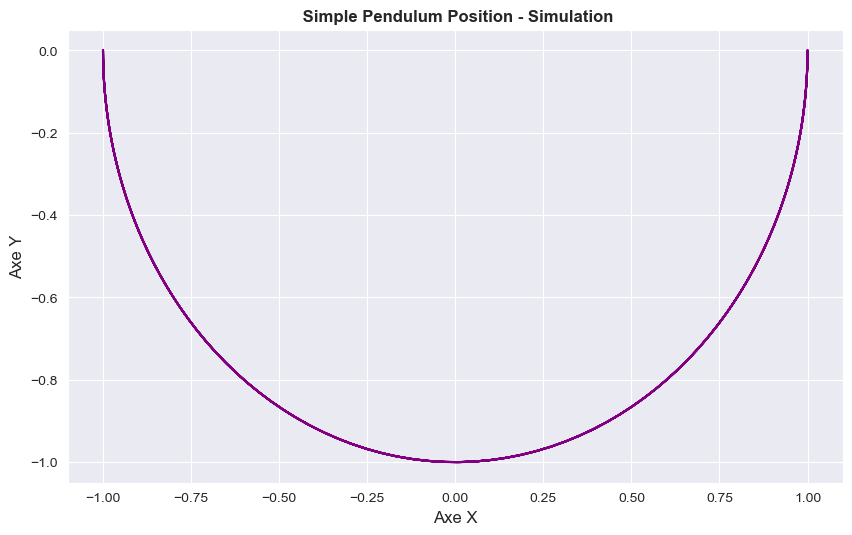

In [47]:
#Plotting
sea.set_style('darkgrid', {'axes.grid': True})
fig,ax = plt.subplots()
ax.plot(x,y, '-b', markersize = 5, color = 'purple', alpha = 1, label = 'Dataset')

#Labels
plt.xlabel('Axe X', fontsize = 12)
plt.ylabel('Axe Y', fontsize = 12)
plt.title(' Simple Pendulum Position - Simulation', fontsize = 12, fontweight = 'bold')

#Setting
plt.gcf().set_size_inches(10,6)
plt.gcf().set_dpi(100)


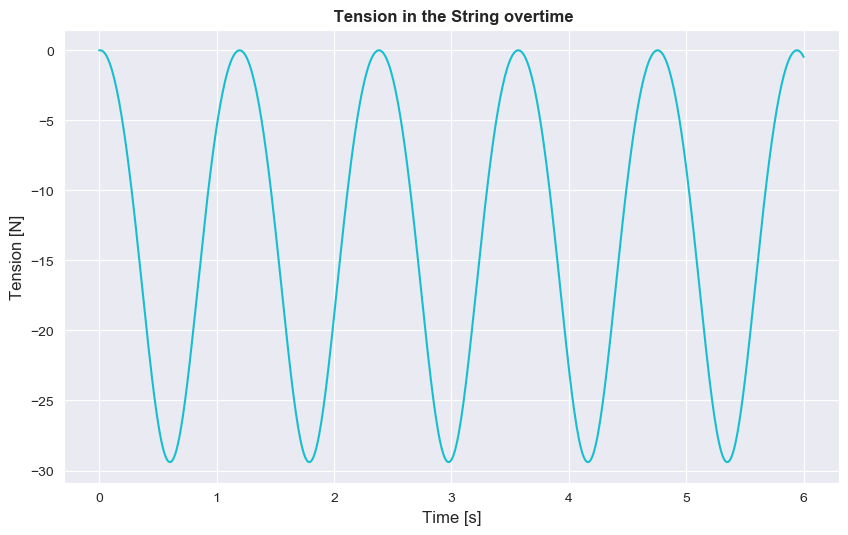

In [48]:
#Plotting
def plot_chart(X,Y,title,color):
    fig,ax = plt.subplots()
    ax.plot(ts,T, '-b', markersize = 5, color = color, alpha = 1, label = 'Dataset')

    #Labels
    plt.xlabel(X, fontsize = 12)
    plt.ylabel(Y, fontsize = 12)
    plt.title(title, fontsize = 12, fontweight = 'bold')

    #Setting
    plt.gcf().set_size_inches(10,6)
    plt.gcf().set_dpi(100)
plot_chart("Time [s]","Tension [N]", " Tension in the String overtime", 'tab:cyan')

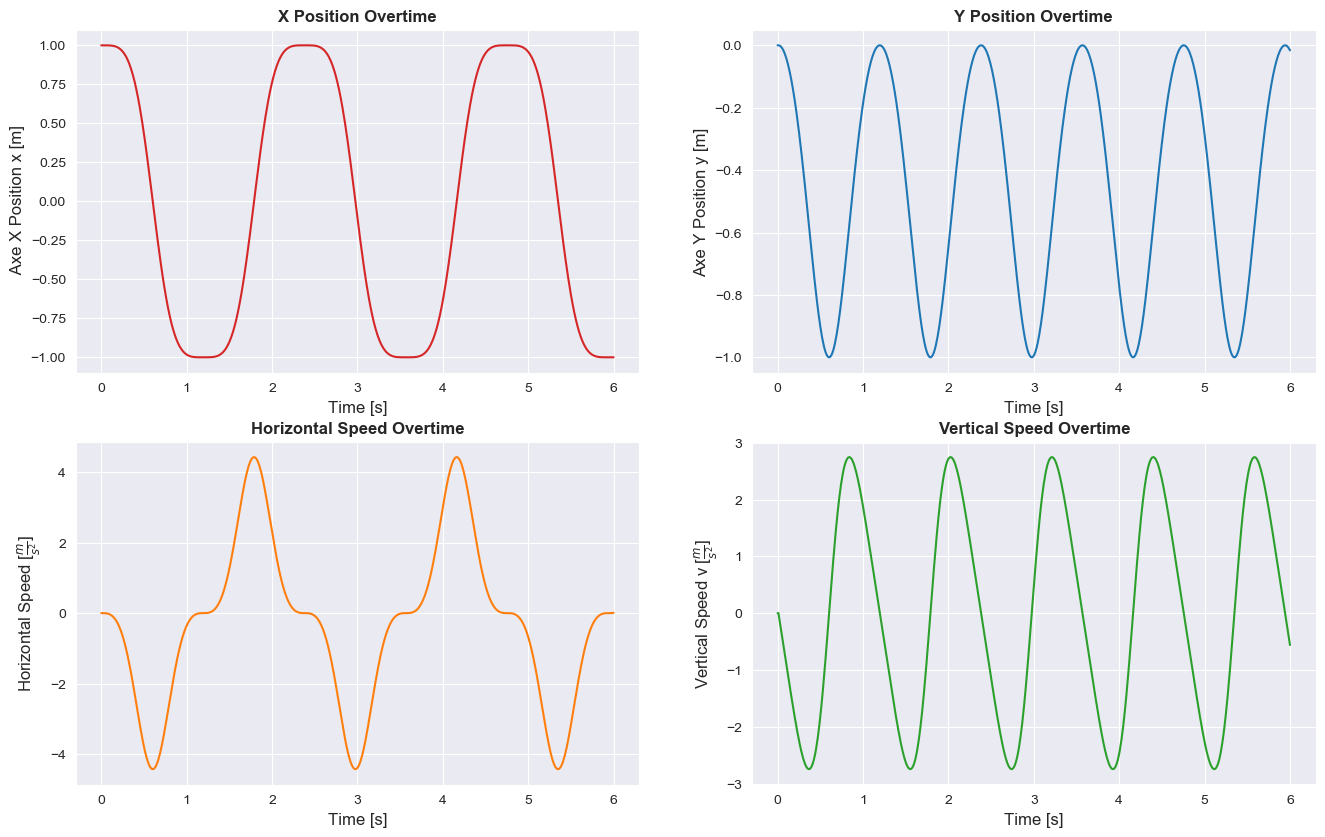

In [39]:
#Subplot1
ax1 = plt.subplot(2,2,1)
plt.plot(ts,x, '-b', markersize = 5, color = 'tab:red', alpha = 1, label = 'Dataset')
#Labels
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel(' Axe X Position x [m]', fontsize = 12)
plt.title("X Position Overtime", fontsize = 12, fontweight = 'bold')

#Subplot2
ax2 = plt.subplot(2,2,2, sharex = ax1)
plt.plot(ts,y, '-b', markersize = 5, color = 'tab:blue', alpha = 1, label = 'Dataset')
#Labels
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel('Axe Y Position y [m]', fontsize = 12)
plt.title("Y Position Overtime", fontsize = 12, fontweight = 'bold')

#Subplot3
ax3 = plt.subplot(2,2,3,sharex = ax1)
plt.plot(ts,u, '-b', markersize = 5, color = 'tab:orange', alpha = 1, label = 'Dataset')
#Labels
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel('Horizontal Speed [$\\frac{m}{s^2}$]', fontsize = 12)
plt.title("Horizontal Speed Overtime", fontsize = 12, fontweight = 'bold')

#Subplot4
ax4 = plt.subplot(2,2,4,sharex = ax1)
plt.plot(ts,v, '-b', markersize = 5, color = 'tab:green', alpha = 1, label = 'Dataset')
#Labels
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel('Vertical Speed v [$\\frac{m}{s^2}$]', fontsize = 12)
plt.title("Vertical Speed Overtime", fontsize = 12, fontweight = 'bold')

#Setting
plt.gcf().set_size_inches(16,10)
plt.gcf().set_dpi(100)